<a href="https://colab.research.google.com/github/awaiskhan005/DATA-SCIENCE-AND-AI-/blob/main/NASDAQ_index_STOCK_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import datetime # import the datetime module

# Define the date range
start_date = '2020-01-01'  # Use a longer historical period for better stock predictions
end_date = datetime.datetime.now() # use the correct module name

In [23]:
# Fetch daily data for NASDAQ index (^IXIC)
data = yf.download('^IXIC', start=start_date, end=end_date, interval='1d')

[*********************100%***********************]  1 of 1 completed


In [24]:
# Display the first few rows of the dataset
print(data.head())

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-01-02  9039.459961  9093.429688  9010.889648  9092.190430  9092.190430   
2020-01-03  8976.429688  9065.759766  8976.429688  9020.769531  9020.769531   
2020-01-06  8943.500000  9072.410156  8943.500000  9071.469727  9071.469727   
2020-01-07  9076.639648  9091.929688  9042.549805  9068.580078  9068.580078   
2020-01-08  9068.030273  9168.889648  9059.379883  9129.240234  9129.240234   

                Volume  
Date                    
2020-01-02  2862700000  
2020-01-03  2586520000  
2020-01-06  2810450000  
2020-01-07  2381740000  
2020-01-08  2472620000  


In [25]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-16,17573.699219,17618.400391,17480.660156,17592.130859,17592.130859,4675530000
2024-09-17,17707.019531,17781.740234,17544.640625,17628.060547,17628.060547,4959520000
2024-09-18,17663.380859,17832.699219,17556.429688,17573.300781,17573.300781,5611630000
2024-09-19,17980.890625,18099.929688,17909.750000,18013.980469,18013.980469,5574650000
2024-09-20,17999.349609,18024.339844,17835.640625,17948.320312,17948.320312,9914480000


In [26]:
# Data Preprocessing: Extract the 'Close' price and normalize the data
close_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

In [27]:
# Function to create dataset for LSTM
def create_dataset(data, time_step=60):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:i+time_step, 0])
        Y.append(data[i+time_step, 0])
    return np.array(X), np.array(Y)

In [28]:
# Prepare the dataset with 60 time steps
time_step = 60
X, Y = create_dataset(scaled_data, time_step)

In [29]:
# Reshape the input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [30]:
# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

In [31]:
# Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))  # Add dropout for regularization
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))  # Final output for predicting the closing price

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [37]:
# Train the model
model.fit(X_train, Y_train, batch_size=32, epochs=100)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 8.8233e-04
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 7.7272e-04
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 8.8892e-04
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 9.1005e-04
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 8.8273e-04
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 7.3647e-04
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 7.2946e-04
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 8.2447e-04
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 8.1731e-04
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 8.5921e-04
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 9.0741e-04
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 7.6621e-04
Epoch 13/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 7.3587e-04
Epoch 14/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 7.9586e-04
E

In [38]:
# Make predictions on the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Inverse transform to get actual values


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [39]:
# Inverse scaling of the true test values
Y_test_actual = scaler.inverse_transform(Y_test.reshape(-1, 1))

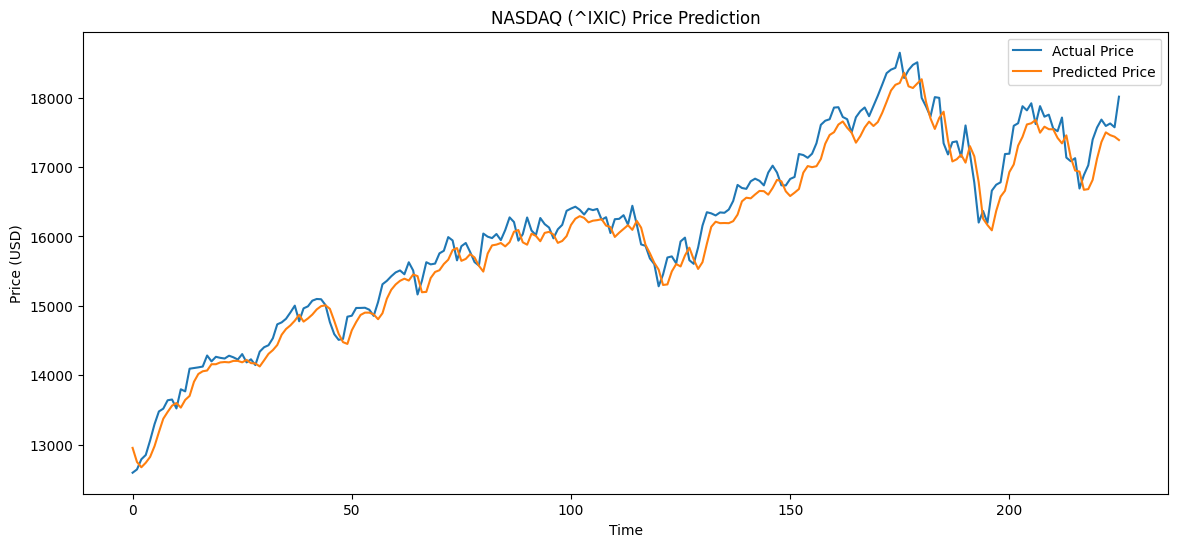

In [40]:
# Plot the results: predicted vs actual NASDAQ prices
plt.figure(figsize=(14, 6))
plt.plot(Y_test_actual, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.title('NASDAQ (^IXIC) Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [41]:
# Predict the next day's price using the last 60 data points
last_60_data = scaled_data[-time_step:].reshape(1, time_step, 1)

In [42]:
# Predict the next day's price
next_day_prediction = model.predict(last_60_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [43]:
# Inverse the normalization to get the actual price
next_day_prediction = scaler.inverse_transform(next_day_prediction)

print(f"Predicted NASDAQ (^IXIC) Price for the next day: {next_day_prediction[0][0]}")

Predicted NASDAQ (^IXIC) Price for the next day: 17750.775390625
